Import Libraries and dependencies

In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


# City Data

In [2]:
data_city= pd.read_csv('Data_files_used/city_attributes.csv')

data_city.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


# Humidity Data

In [3]:
#Read humidity data file as csv 
data_humidity=pd.read_csv('Data_files_used/humidity.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_humidity= pd.DataFrame(data_humidity['New York']).rename(columns={'New York':'Humidity(%)'})

df_humidity = df_humidity.fillna(method='ffill')
df_humidity = df_humidity.fillna(method='bfill')
df_humidity.head()

,Humidity(%)
datetime,
2012-10-01 12:00:00,58.0
2012-10-01 13:00:00,58.0
2012-10-01 14:00:00,57.0
2012-10-01 15:00:00,57.0
2012-10-01 16:00:00,57.0


C:\Users\ruchi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


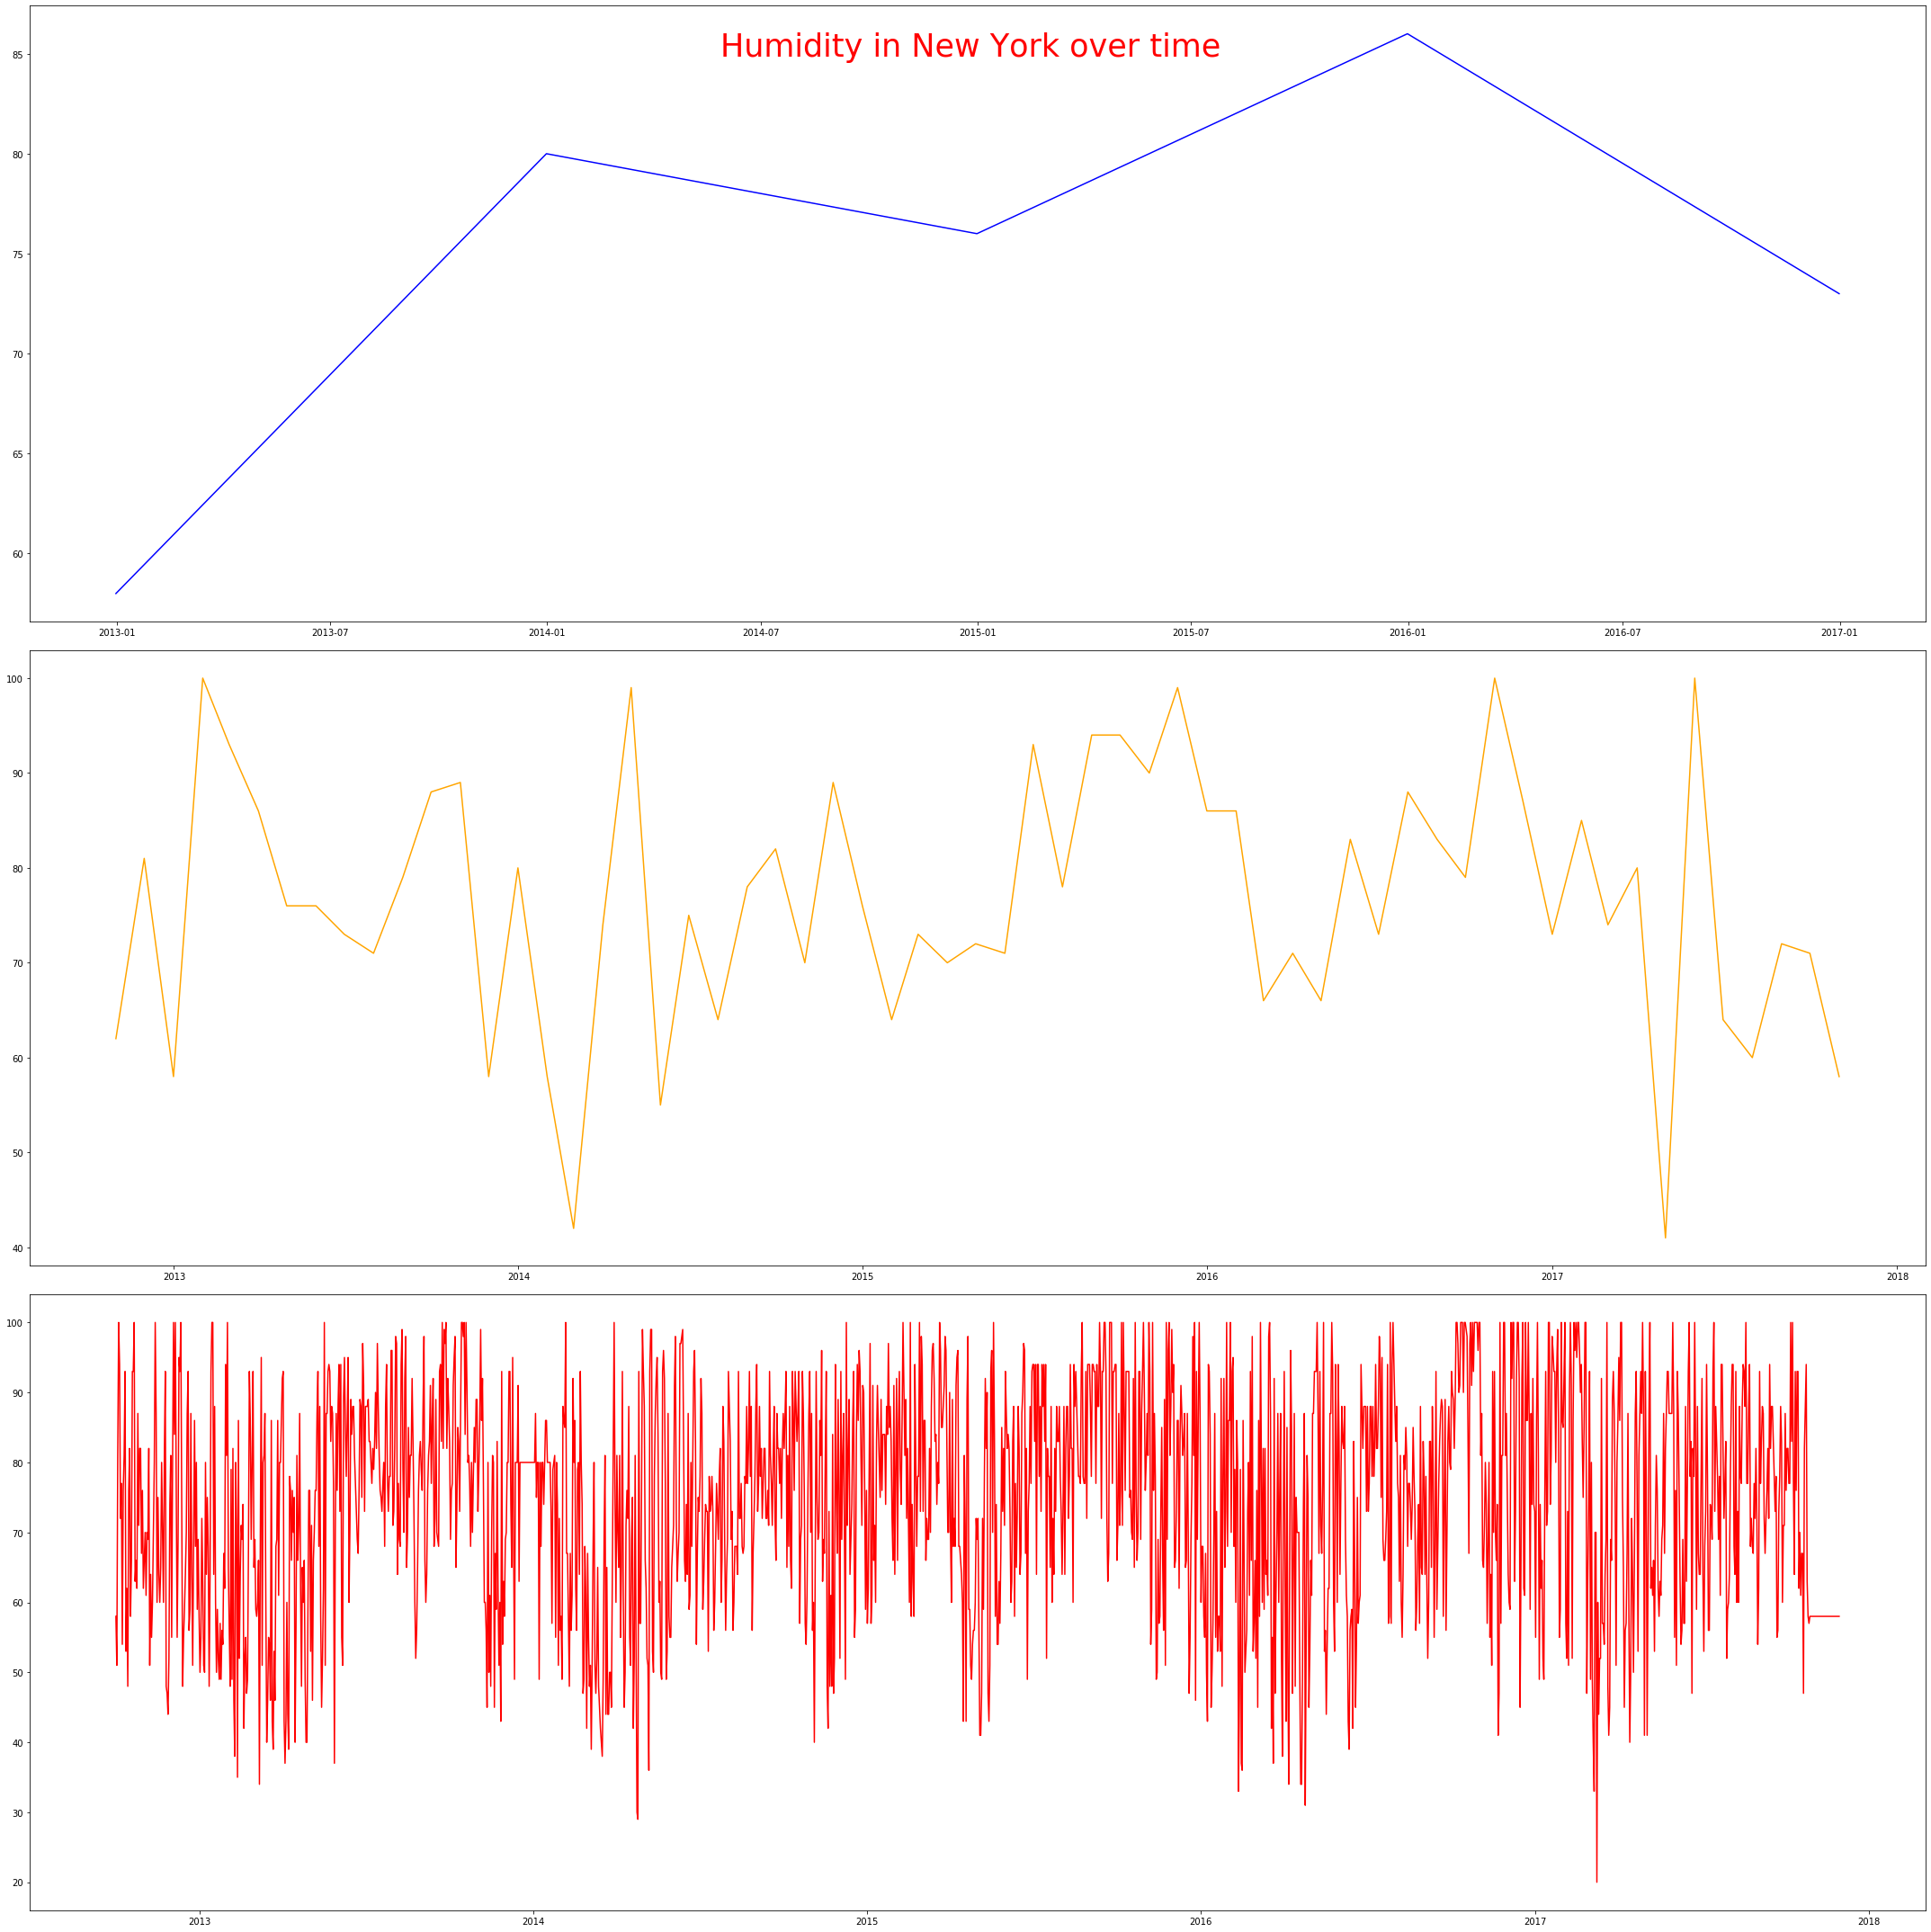

In [4]:
#subplots for variation in humidity over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Humidity in New York over time', fontsize=35, color='red')

ax1.plot(df_humidity['Humidity(%)'].asfreq('Y'), color='blue')
ax2.plot(df_humidity['Humidity(%)'].asfreq('m'), color='orange')
ax3.plot(df_humidity['Humidity(%)'].asfreq('d'),color='red')

            Humidity(%)
datetime               
2012-10-01    56.416667
2012-10-02    50.500000
2012-10-03    68.541667
2012-10-04    95.000000
2012-10-05    93.041667


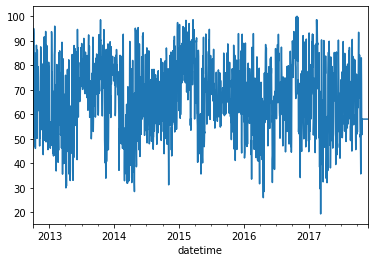

In [5]:
#df_humidity = df_humidity.resample('Y').mean()
df_humidity = df_humidity.resample('D').mean()

print(df_humidity.head())
df_humidity['Humidity(%)'].asfreq('D').plot()

# Pressure Data

In [6]:
#Read pressure data file as csv 
data_pressure=pd.read_csv('Data_files_used/pressure.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_pressure= pd.DataFrame(data_pressure['New York']).rename(columns={'New York':'Pressure(Torr)'})

df_pressure = df_pressure.fillna(method='ffill')
df_pressure = df_pressure.fillna(method='bfill')
#Show DataFrame
df_pressure.head()

,Pressure(Torr)
datetime,
2012-10-01 12:00:00,1012.0
2012-10-01 13:00:00,1012.0
2012-10-01 14:00:00,1012.0
2012-10-01 15:00:00,1012.0
2012-10-01 16:00:00,1012.0


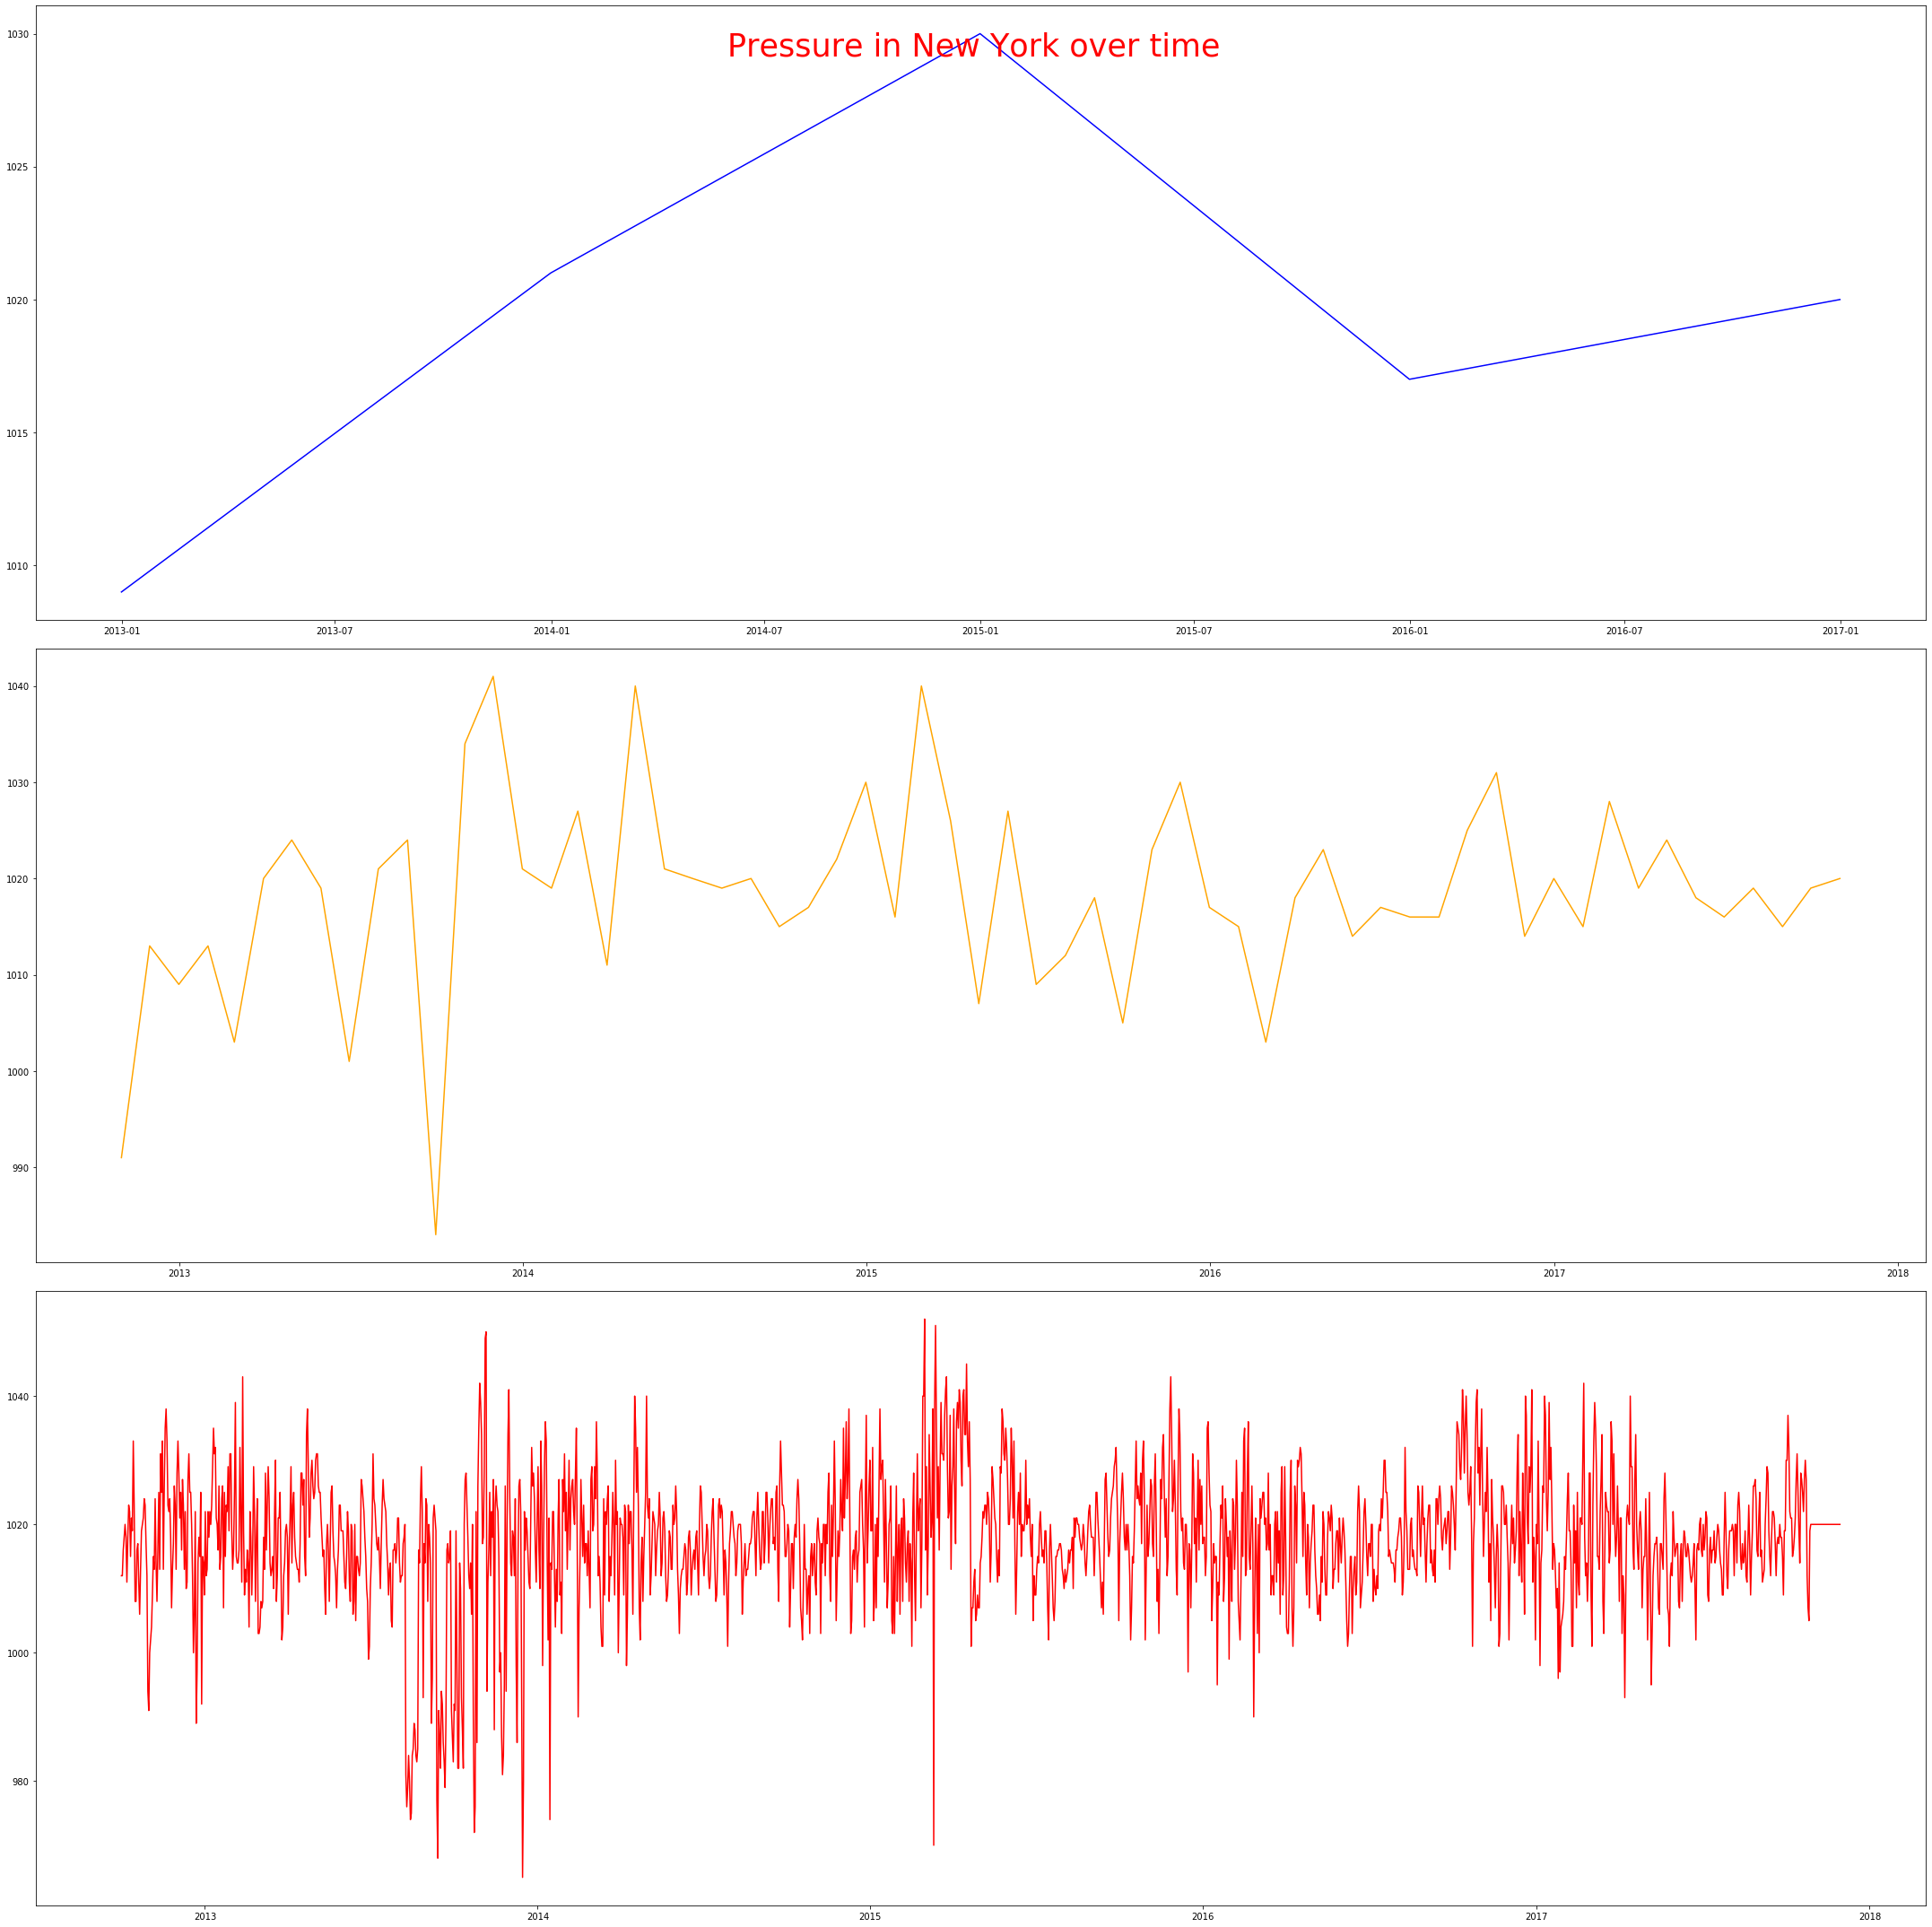

In [7]:
#subplots for variation in pressure over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Pressure in New York over time', fontsize=35, color='red')

ax1.plot(df_pressure['Pressure(Torr)'].asfreq('Y'), color='blue')
ax2.plot(df_pressure['Pressure(Torr)'].asfreq('m'), color='orange')
ax3.plot(df_pressure['Pressure(Torr)'].asfreq('d'),color='red')

# Temperature


In [8]:
#Read temperature data file as csv 
data_temp=pd.read_csv('Data_files_used/temperature.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_temp= pd.DataFrame(data_temp['New York']).rename(columns={'New York':'Temp(K)'})

#convert temperature in Kelvin to degree Celcius
df_temp['Temp(C)']= df_temp['Temp(K)']- 273.15

df_temp = df_temp.fillna(method='ffill')
df_temp = df_temp.fillna(method='bfill')

#Show DataFrame
df_temp.head()

,Temp(K),Temp(C)
datetime,,
2012-10-01 12:00:00,288.220000,15.070000
2012-10-01 13:00:00,288.220000,15.070000
2012-10-01 14:00:00,288.247676,15.097676
2012-10-01 15:00:00,288.326940,15.176940
2012-10-01 16:00:00,288.406203,15.256203


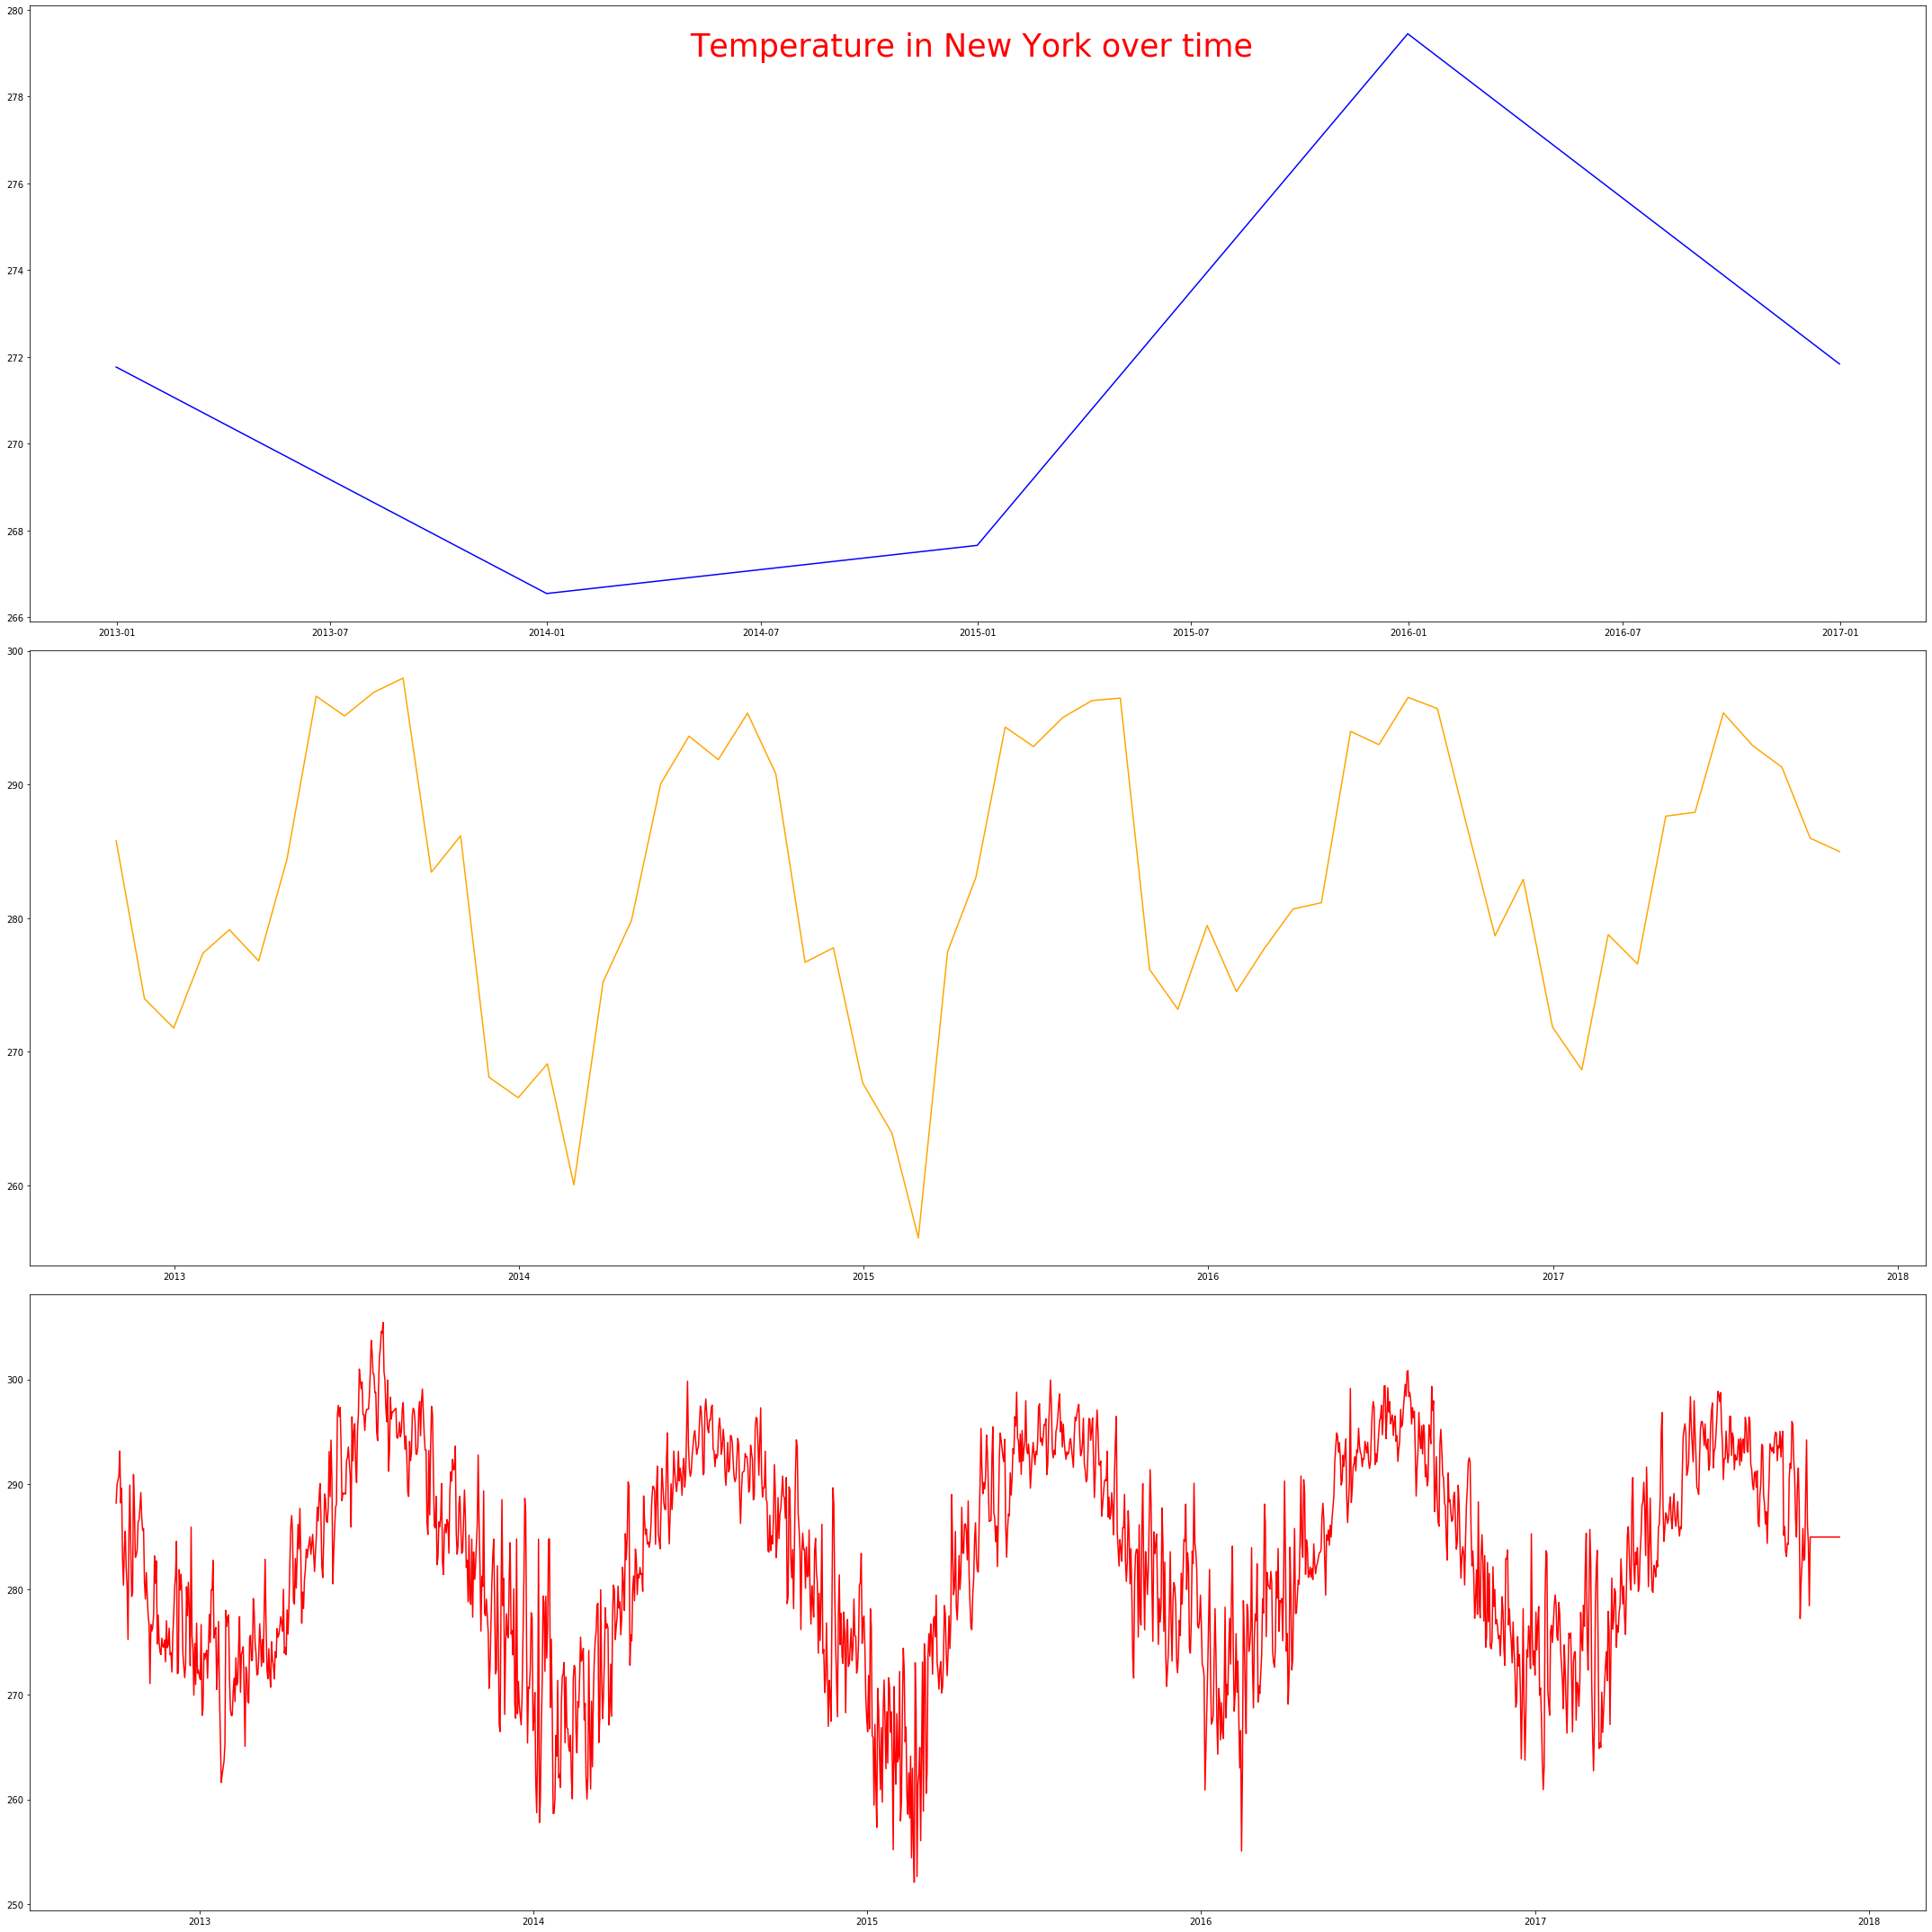

In [9]:
#subplots for variation in Temperature over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Temperature in New York over time', fontsize=35, color='red')

ax1.plot(df_temp['Temp(K)'].asfreq('y'), color='blue')
ax2.plot(df_temp['Temp(K)'].asfreq('m'), color='orange')
ax3.plot(df_temp['Temp(K)'].asfreq('d'),color='red')

# Weather Description

In [10]:
#Read Weather data file as csv 
data_weather=pd.read_csv('Data_files_used/weather_description.csv', index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_weather= pd.DataFrame(data_weather['New York']).rename(columns={'New York':'Weather'})

df_weather = df_weather.fillna(method='ffill')
df_weather = df_weather.fillna(method='bfill')

#Show DataFrame
df_weather.head()

,Weather
datetime,
2012-10-01 12:00:00,few clouds
2012-10-01 13:00:00,few clouds
2012-10-01 14:00:00,few clouds
2012-10-01 15:00:00,few clouds
2012-10-01 16:00:00,few clouds


In [11]:
df_weather['Weather'].value_counts()

sky is clear                           12393
broken clouds                           6263
mist                                    5415
scattered clouds                        4595
overcast clouds                         4481
light rain                              4002
few clouds                              3330
fog                                     1085
moderate rain                            950
haze                                     691
light intensity drizzle                  408
light snow                               383
heavy intensity rain                     372
drizzle                                  224
heavy snow                               130
proximity thunderstorm                   114
snow                                      99
very heavy rain                           94
thunderstorm                              74
thunderstorm with light rain              36
dust                                      21
heavy intensity drizzle                   20
thundersto

In [12]:
df_weather['Weather']=df_weather['Weather'].replace({'drizzle':'Drizzle','light intensity drizzle':'Drizzle','heavy intensity drizzle':'Drizzle',
                                                     'moderate rain':'Rainy','light rain':'Rainy','heavy intensity rain':'Rainy','very heavy rain':'Rainy', 
                                                     'shower rain':'Rainy', 'light intensity shower rain':'Rainy', 'freezing rain':'Rainy',
                                                     'scattered clouds':'Cloudy','few clouds':'Cloudy','broken clouds':'Cloudy',
                                                   'overcast clouds':'Cloudy','sky is clear':'Clear',
                                                     'light snow':'Snow', 'snow':'Snow', 'heavy snow':'Snow',
                                                     'thunderstorm':'Thunderstorm', 'proximity thunderstorm':'Thunderstorm','thunderstorm with light rain':'Thunderstorm',
                                                     'thunderstorm with rain':'Thunderstorm',  'thunderstorm with heavy rain':'Thunderstorm', 'squalls':'Thunderstorm',
                                                     'proximity thunderstorm with rain':'Thunderstorm',  'thunderstorm with light drizzle':'Thunderstorm', 
                                                     'proximity thunderstorm with drizzle':'Thunderstorm',  'heavy thunderstorm':'Thunderstorm', 
                                                     'haze':'Haze', 'mist':'Mist', 'light rain and snow':'Mist', 
                                                   'fog':'Fog', 'smoke':'Haze',
                                                    'sand/dust whirls':'Dust', 'dust':'Dust', 'sand':'Dust'
                                                    })

df_weather.head()

,Weather
datetime,
2012-10-01 12:00:00,Cloudy
2012-10-01 13:00:00,Cloudy
2012-10-01 14:00:00,Cloudy
2012-10-01 15:00:00,Cloudy
2012-10-01 16:00:00,Cloudy


# Wind Speed

In [13]:
#Read Weather data file as csv 
data_windspeed=pd.read_csv('Data_files_used/wind_speed.csv',index_col='datetime', parse_dates=['datetime'])

#save dataframe and rename columns
df_windspeed= pd.DataFrame(data_windspeed['New York']).rename(columns={'New York':'Wind Speed'})

df_windspeed = df_windspeed.fillna(method='ffill')
df_windspeed= df_windspeed.fillna(method='bfill')

#Show DataFrame
df_windspeed.head()

,Wind Speed
datetime,
2012-10-01 12:00:00,7.0
2012-10-01 13:00:00,7.0
2012-10-01 14:00:00,7.0
2012-10-01 15:00:00,7.0
2012-10-01 16:00:00,7.0


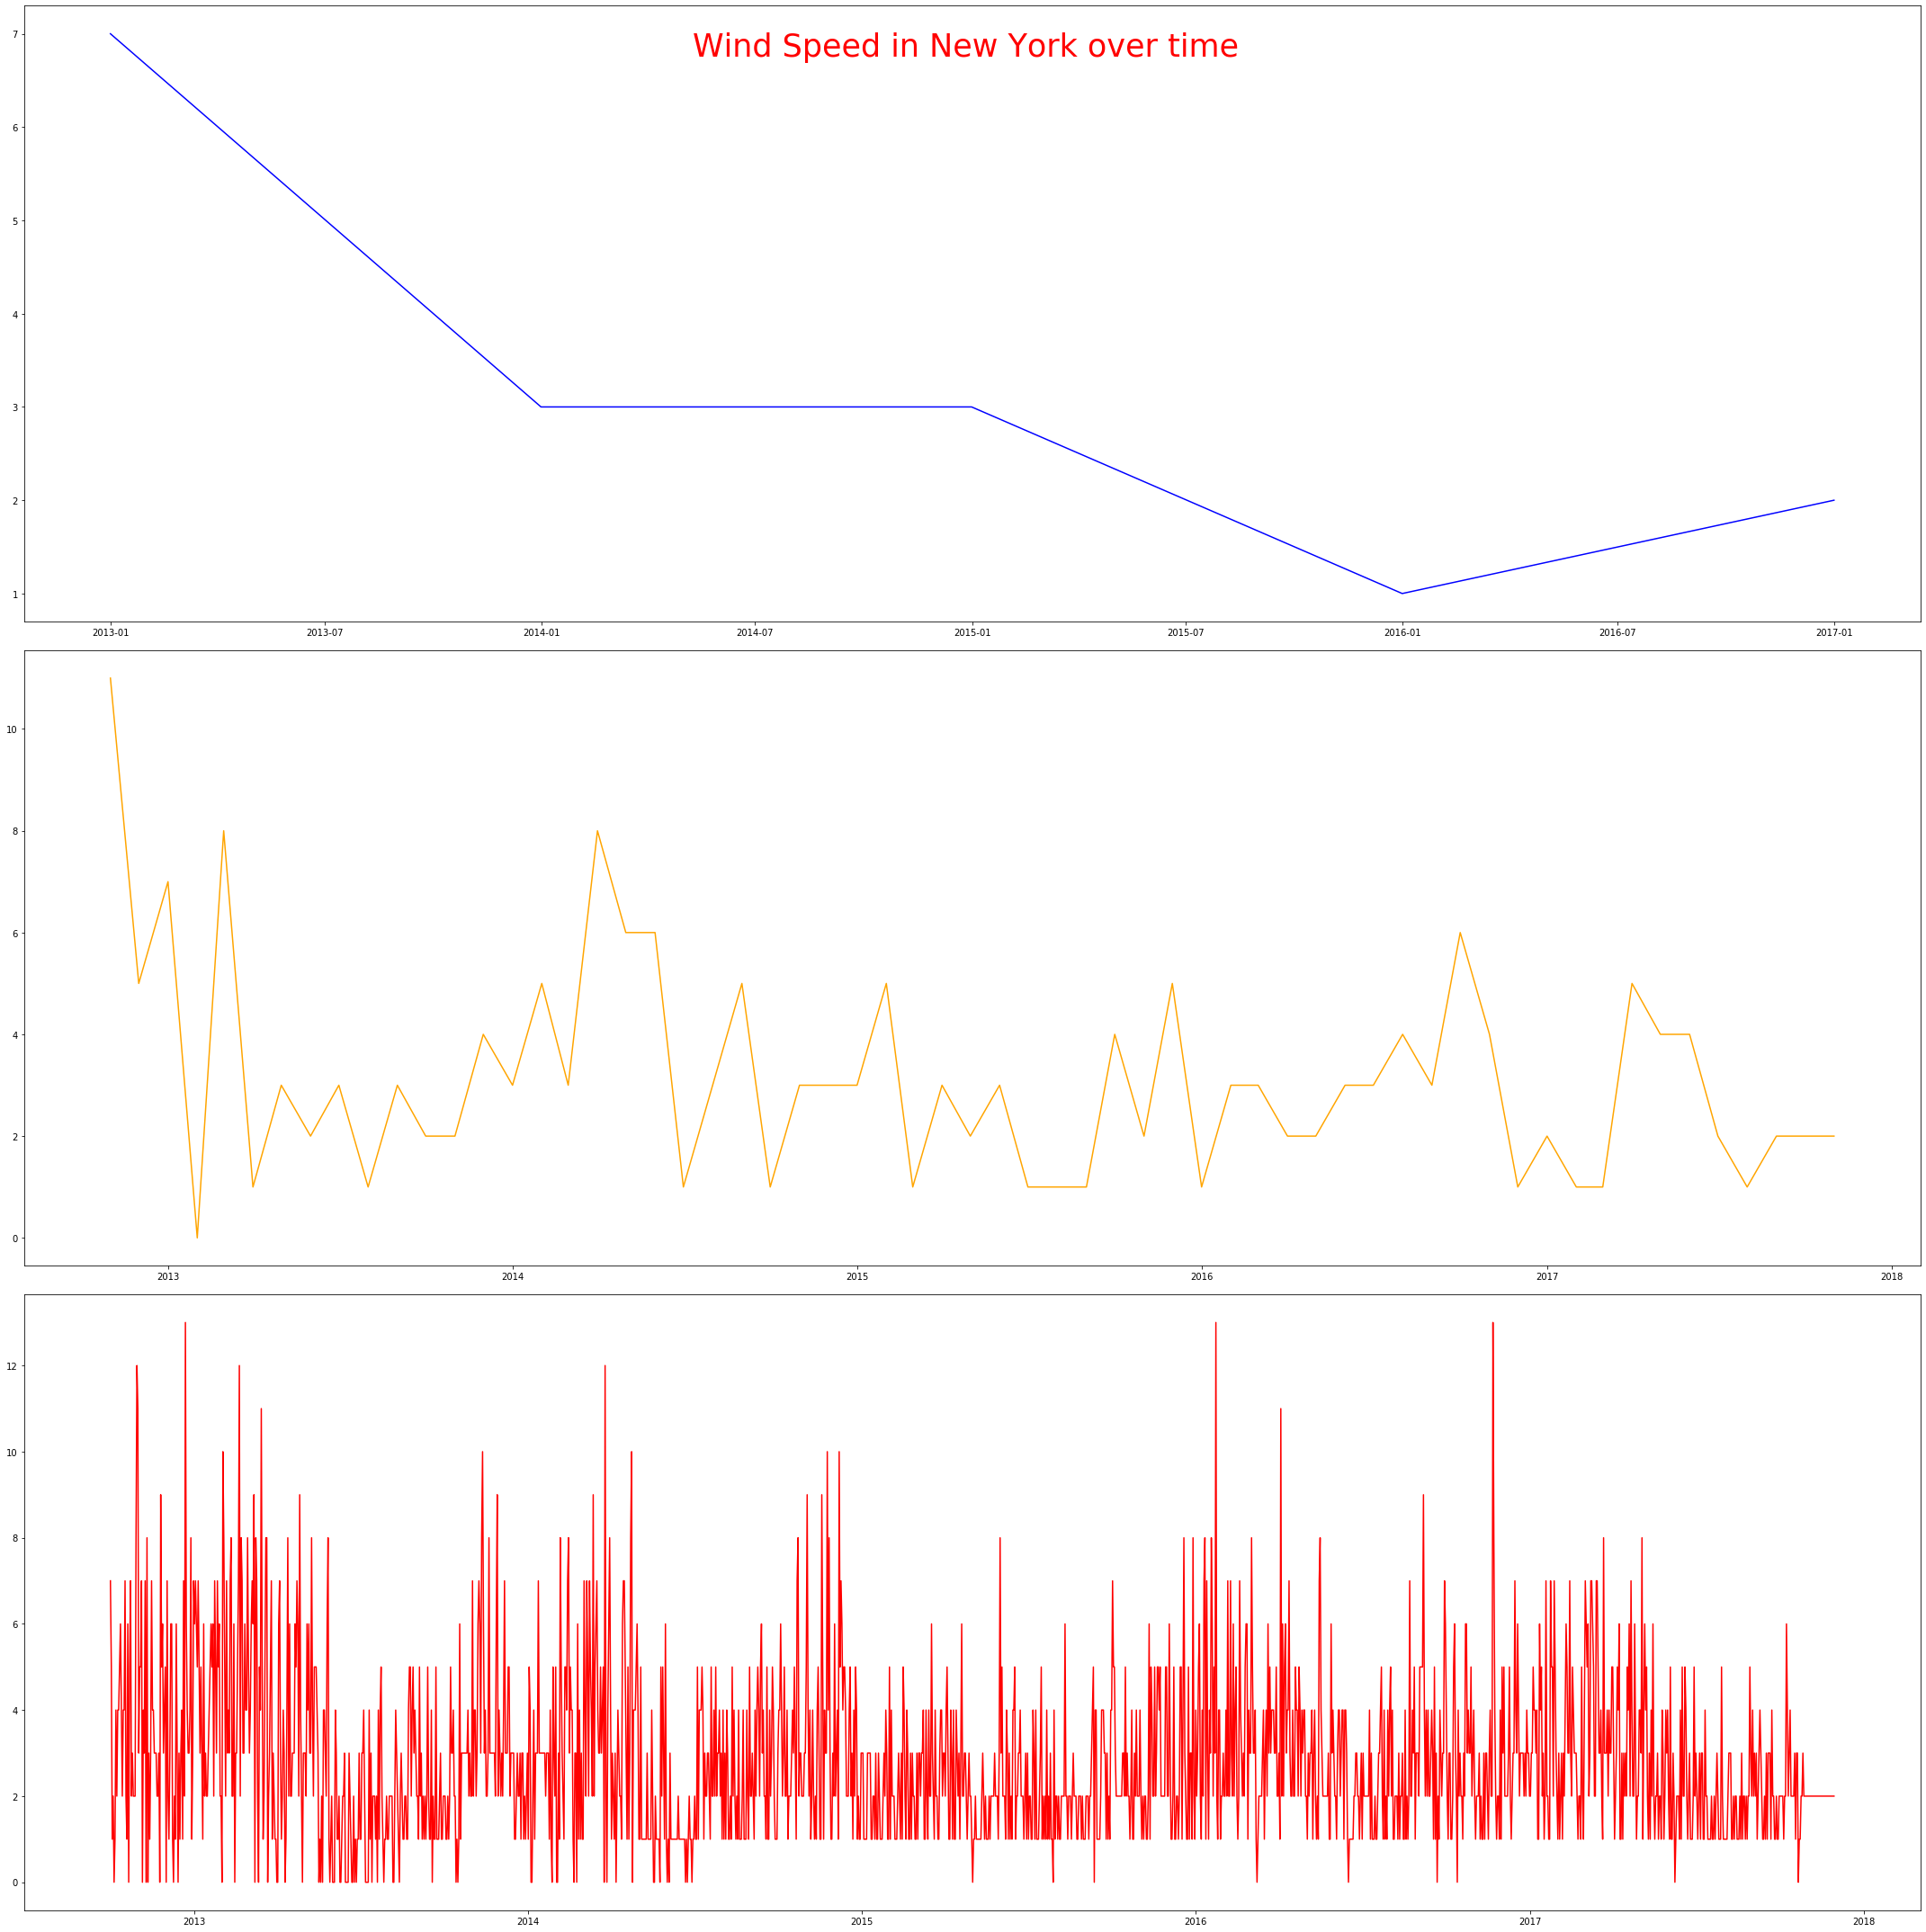

In [14]:
#subplots for variation in Wind Speed over the years
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (30,30))
fig.tight_layout()
fig.suptitle('Wind Speed in New York over time', fontsize=35, color='red')

ax1.plot(df_windspeed['Wind Speed'].asfreq('Y'), color='blue')
ax2.plot(df_windspeed['Wind Speed'].asfreq('m'), color='orange')
ax3.plot(df_windspeed['Wind Speed'].asfreq('d'),color='red')

# Combined Data

In [35]:
#df= [df_temp, df_humidity, df_pressure, df_weather, df_windspeed]

#Create DataFrames to merge weather data for New York

df1= pd.merge(df_temp, df_humidity, on='datetime', how='outer')
df2=pd.merge(df1, df_pressure, on='datetime', how='outer')
df3=pd.merge(df2, df_weather, on='datetime', how='outer')
df4=pd.merge(df3,df_windspeed, on='datetime', how='outer')

#Create date time object
df4=df4.reset_index()
df4['datetimeobj'] =  pd.to_datetime(df4['datetime'], format='%Y-%m-%d %H:%M:%S.%f')

#Define final weather_data DataFrame

weather_data_NY=pd.DataFrame(df4)
weather_data_NY['Year']= df4['datetime'].dt.year
weather_data_NY['Month']= df4['datetime'].dt.month
weather_data_NY['Hour']= df4['datetime'].dt.hour
weather_data_NY['Date']= df4['datetime'].dt.date

#Rearrange Columns for the final dataframe and set index

weather_data_NY=weather_data_NY.loc[:, ['datetime','Date','Year','Month','Hour','Temp(K)','Temp(C)','Humidity(%)',
                                        'Pressure(Torr)','Weather','Wind Speed']]
weather_data_NY.head()

,datetime,Date,Year,Month,Hour,Temp(K),Temp(C),Humidity(%),Pressure(Torr),Weather,Wind Speed
0,2012-10-01 12:00:00,2012-10-01,2012,10,12,288.220000,15.070000,NaN,1012.0,Cloudy,7.0
1,2012-10-01 13:00:00,2012-10-01,2012,10,13,288.220000,15.070000,NaN,1012.0,Cloudy,7.0
2,2012-10-01 14:00:00,2012-10-01,2012,10,14,288.247676,15.097676,NaN,1012.0,Cloudy,7.0
3,2012-10-01 15:00:00,2012-10-01,2012,10,15,288.326940,15.176940,NaN,1012.0,Cloudy,7.0
4,2012-10-01 16:00:00,2012-10-01,2012,10,16,288.406203,15.256203,NaN,1012.0,Cloudy,7.0


# Plotting Weather data

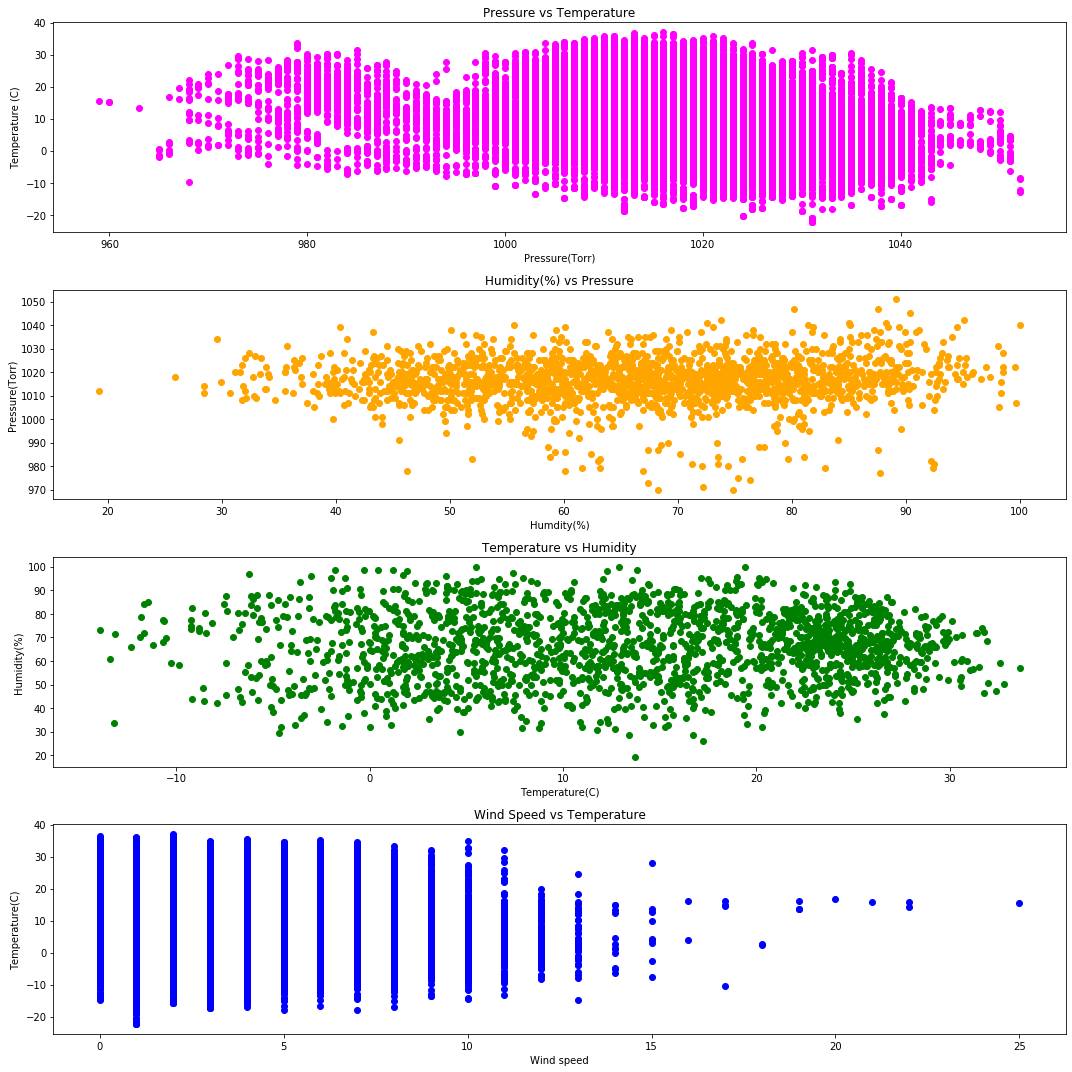

In [42]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(nrows=4, ncols=1, figsize=(15,15))

ax1.scatter(x=weather_data_NY['Pressure(Torr)'],y=weather_data_NY['Temp(C)'],color='magenta')
ax1.set_title('Pressure vs Temperature')
ax1.set_xlabel('Pressure(Torr)')
ax1.set_ylabel('Temperature (C)')


ax2.scatter(x=weather_data_NY['Humidity(%)'],y=weather_data_NY['Pressure(Torr)'],color='orange')
ax2.set_title('Humidity(%) vs Pressure')
ax2.set_xlabel('Humdity(%)')
ax2.set_ylabel('Pressure(Torr)')

ax3.scatter(x=weather_data_NY['Temp(C)'],y=weather_data_NY['Humidity(%)'],color='green')
ax3.set_title('Temperature vs Humidity')
ax3.set_xlabel('Temperature(C)')
ax3.set_ylabel('Humidity(%)')

ax4.scatter(x=weather_data_NY['Wind Speed'],y=weather_data_NY['Temp(C)'],color='blue')
ax4.set_title('Wind Speed vs Temperature')
ax4.set_xlabel('Wind speed')
ax4.set_ylabel('Temperature(C)')
plt.tight_layout()

In [36]:
#Average Yearly weather data
mean_temp_Y = weather_data_NY.groupby(['Year'])['Temp(C)'].mean()

max_temp_Y = weather_data_NY.groupby(['Year'])['Temp(C)'].max()

min_temp_Y= weather_data_NY.groupby(['Year'])['Temp(C)'].min()

mean_pressure_Y = weather_data_NY.groupby(['Year'])['Pressure(Torr)'].mean()

mean_humidity_Y = weather_data_NY.groupby(['Year'])['Humidity(%)'].mean()

mean_wind_Y = weather_data_NY.groupby(['Year'])['Wind Speed'].mean()

mean_weather_Y = pd.DataFrame()
mean_weather_Y['Average Temp'] = mean_temp_Y
mean_weather_Y['Max Temp'] = max_temp_Y
mean_weather_Y['Min Temp'] = min_temp_Y
mean_weather_Y['Average Wind Speed'] = mean_wind_Y
mean_weather_Y['Average Pressure'] = mean_pressure_Y
mean_weather_Y['Average Humidity'] = mean_humidity_Y

#meanpdx.reset_index(level=0, inplace=True)
#theyear = pd.DatetimeIndex(meanpdx['date'])
#meanpdx['year'] = theyear.year
#meanpdx['month'] = theyear.month
#meanpdx['day'] = theyear.day

mean_weather_Y.head()

,Average Temp,Max Temp,Min Temp,Average Wind Speed,Average Pressure,Average Humidity
Year,,,,,,
2012,8.329662,26.63,-3.550,4.219035,1016.546903,67.039855
2013,12.192714,37.09,-11.930,3.179224,1013.548630,67.314726
2014,11.367393,33.67,-15.910,3.309703,1016.980822,63.734132
2015,11.793242,34.07,-22.376,2.726256,1019.986758,70.579452
2016,12.905313,35.22,-18.080,3.394353,1017.869080,65.331853


In [41]:
#Daily Average weather data

mean_temp_D = weather_data_NY.groupby(['Date','Year'])['Temp(C)'].mean()

max_temp_D = weather_data_NY.groupby(['Date','Year'])['Temp(C)'].max()

min_temp_D = weather_data_NY.groupby(['Date','Year'])['Temp(C)'].min()

mean_pressure_D = weather_data_NY.groupby(['Date','Year'])['Pressure(Torr)'].mean()

mean_humidity_D = weather_data_NY.groupby(['Date','Year'])['Humidity(%)'].mean()

mean_wind_D = weather_data_NY.groupby(['Date','Year'])['Wind Speed'].mean()

mean_weather_date = pd.DataFrame()
mean_weather_date['Average Temp'] = mean_temp_D
mean_weather_date['Max Temp'] = max_temp_D
mean_weather_date['Min Temp'] = min_temp_D
mean_weather_date['Average Wind Speed'] = mean_wind_D
mean_weather_date['Average Pressure'] = mean_pressure_D
mean_weather_date['Average Humidity'] = mean_humidity_D

mean_weather_date.head()

,,Average Temp,Max Temp,Min Temp,Average Wind Speed,Average Pressure,Average Humidity
Date,Year,,,,,,
2012-10-01,2012,15.390302,15.811048,15.070000,6.416667,1012.000000,56.416667
2012-10-02,2012,17.742389,21.700000,15.890311,4.833333,1011.958333,50.500000
2012-10-03,2012,16.915625,19.730000,15.390000,2.416667,1015.541667,68.541667
2012-10-04,2012,18.837083,22.120000,16.970000,1.875000,1016.875000,95.000000
2012-10-05,2012,20.893542,23.120000,18.430000,1.375000,1019.250000,93.041667


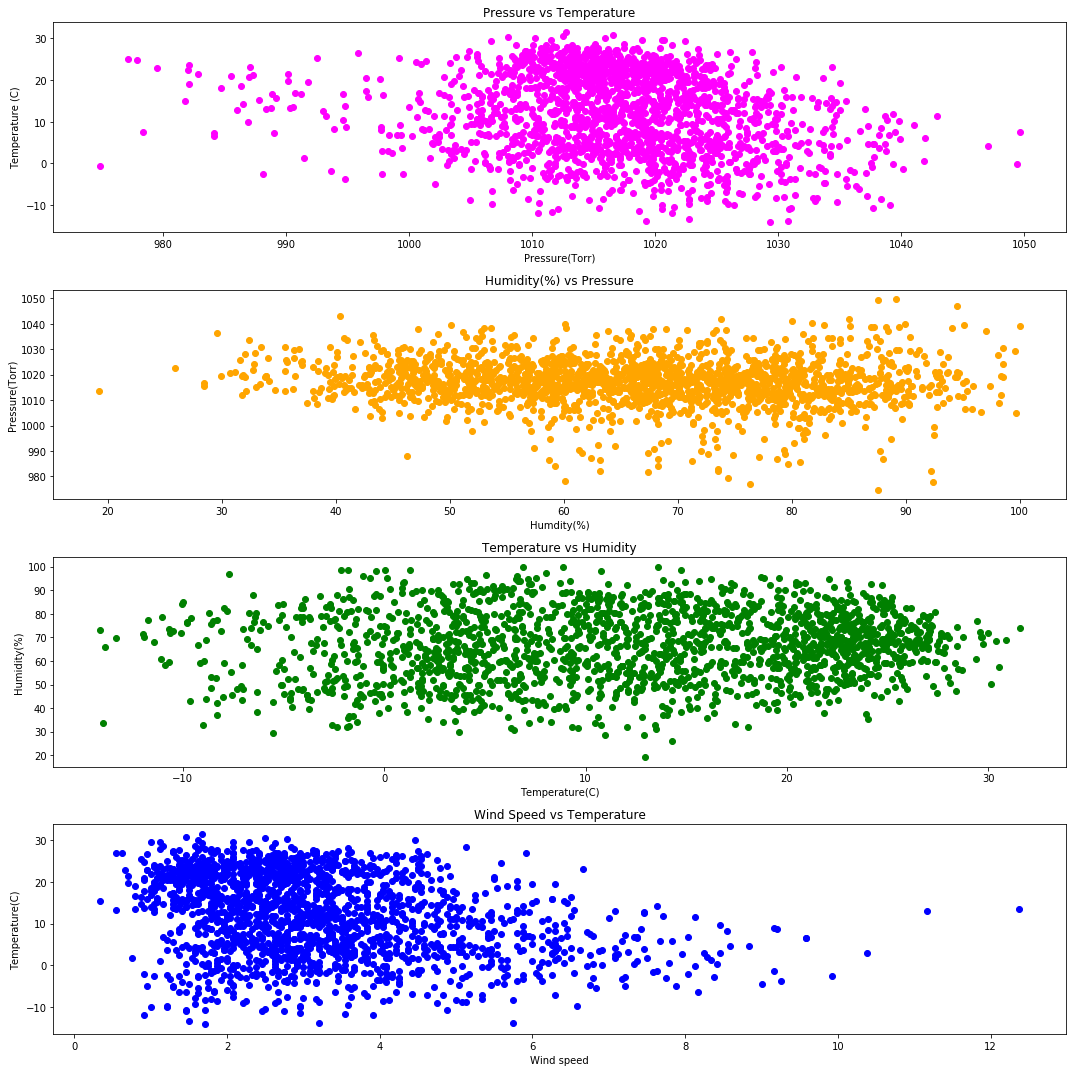

In [40]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(nrows=4, ncols=1, figsize=(15,15))

ax1.scatter(x=mean_weather_date['Average Pressure'],y=mean_weather_date['Average Temp'],color='magenta')
ax1.set_title('Pressure vs Temperature')
ax1.set_xlabel('Pressure(Torr)')
ax1.set_ylabel('Temperature (C)')


ax2.scatter(x=mean_weather_date['Average Humidity'],y=mean_weather_date['Average Pressure'],color='orange')
ax2.set_title('Humidity(%) vs Pressure')
ax2.set_xlabel('Humdity(%)')
ax2.set_ylabel('Pressure(Torr)')

ax3.scatter(x=mean_weather_date['Average Temp'],y=mean_weather_date['Average Humidity'],color='green')
ax3.set_title('Temperature vs Humidity')
ax3.set_xlabel('Temperature(C)')
ax3.set_ylabel('Humidity(%)')

ax4.scatter(x=mean_weather_date['Average Wind Speed'],y=mean_weather_date['Average Temp'],color='blue')
ax4.set_title('Wind Speed vs Temperature')
ax4.set_xlabel('Wind speed')
ax4.set_ylabel('Temperature(C)')
plt.tight_layout()